# Obesity Levels Research Project
## AAI 500 - Fall 2024

### Researchers

    Bosky Atani
    Dean P. Simmer

In [5]:
import pandas as pd

# load the data file
obesity_file_path = "data/ObesityDataSet_raw_and_data_sinthetic.csv"
students = pd.read_csv(obesity_file_path , sep=",")
students.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


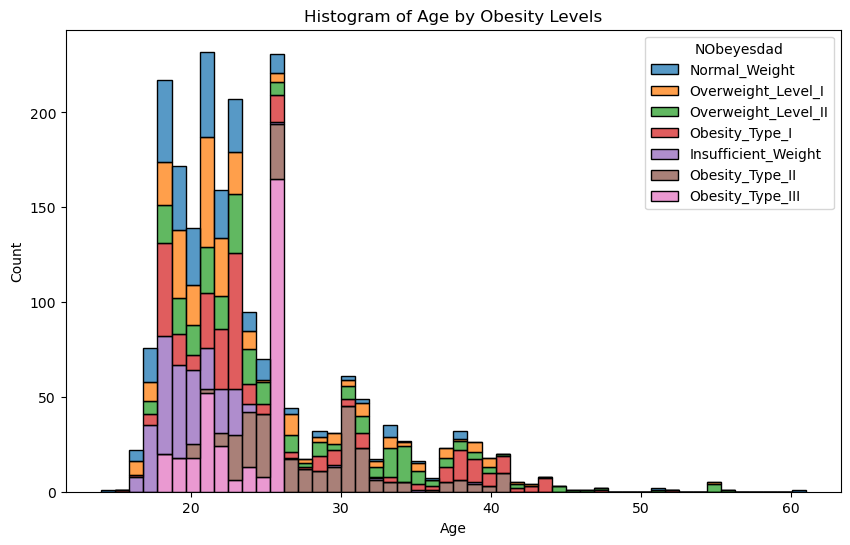

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=students, x='Age', hue='NObeyesdad', multiple='stack', kde=False)

# Add labels and title for histogram
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age by Obesity Levels')
plt.show()